## 1. Introduction.
The CIFAR-10 dataset contains 60,000 color images of 32 x 32 pixels in 3 channels divided into 10
classes. Each class contains 6,000 images. The training set contains 50,000 images, while the test sets
provides 10,000 images. T This is a classification problem with 10 classes(muti-label classification). We can take a view on this image for more comprehension of the dataset. 

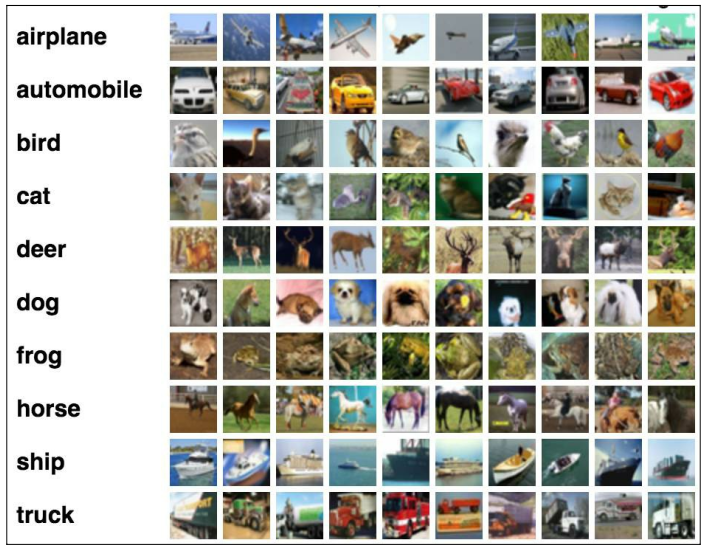


The challenge is to recognize previously unseen images and assign them to one of the 10 classes.

In [1]:
# import libraries
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline


Using TensorFlow backend.


In [2]:
#  models hyperparameters and others global parameters.
batch_size = 32 
num_classes = 10  
epochs = 100
data_augmentation = False

In [3]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


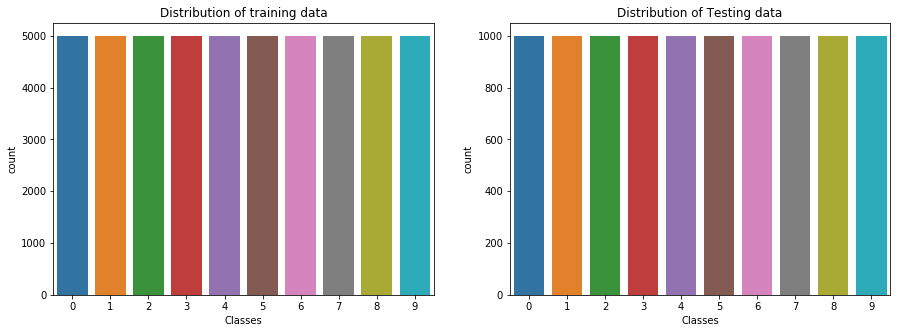

In [4]:
# Distribution of data.
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

In [5]:
# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

In [7]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [8]:
history = None  # For recording the history of trainning process.
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 14s 285us/step - loss: 1.8088 - accuracy: 0.3338 - val_loss: 1.5749 - val_accuracy: 0.4236
Epoch 2/100
50000/50000 [==============================] - 10s 203us/step - loss: 1.5050 - accuracy: 0.4555 - val_loss: 1.3536 - val_accuracy: 0.5107
Epoch 3/100
50000/50000 [==============================] - 10s 197us/step - loss: 1.3675 - accuracy: 0.5076 - val_loss: 1.2446 - val_accuracy: 0.5536
Epoch 4/100
50000/50000 [==============================] - 10s 198us/step - loss: 1.2658 - accuracy: 0.5488 - val_loss: 1.1506 - val_accuracy: 0.5948
Epoch 5/100
50000/50000 [==============================] - 10s 202us/step - loss: 1.1810 - accuracy: 0.5822 - val_loss: 1.0703 - val_accuracy: 0.6232
Epoch 6/100
50000/50000 [==============================] - 11s 214us/step - loss: 1.1155 - accuracy: 0.6078 - val_loss: 1.0546 - val_accuracy: 0.6315
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 10s 195us/step - loss: 0.6356 - accuracy: 0.7889 - val_loss: 0.7045 - val_accuracy: 0.7775
Epoch 56/100
50000/50000 [==============================] - 10s 196us/step - loss: 0.6392 - accuracy: 0.7889 - val_loss: 0.6536 - val_accuracy: 0.7883
Epoch 57/100
50000/50000 [==============================] - 10s 199us/step - loss: 0.6334 - accuracy: 0.7894 - val_loss: 0.7688 - val_accuracy: 0.7747
Epoch 58/100
50000/50000 [==============================] - 10s 197us/step - loss: 0.6355 - accuracy: 0.7884 - val_loss: 0.7169 - val_accuracy: 0.7806
Epoch 59/100
50000/50000 [==============================] - 10s 207us/step - loss: 0.6335 - accuracy: 0.7903 - val_loss: 0.7195 - val_accuracy: 0.7667
Epoch 60/100
50000/50000 [==============================] - 11s 210us/step - loss: 0.6326 - accuracy: 0.7896 - val_loss: 0.6590 - val_accuracy: 0.7876
Epoch 61/100
50000/50000 [==============================] - 10s 200us/step - loss: 0.6406 - ac

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


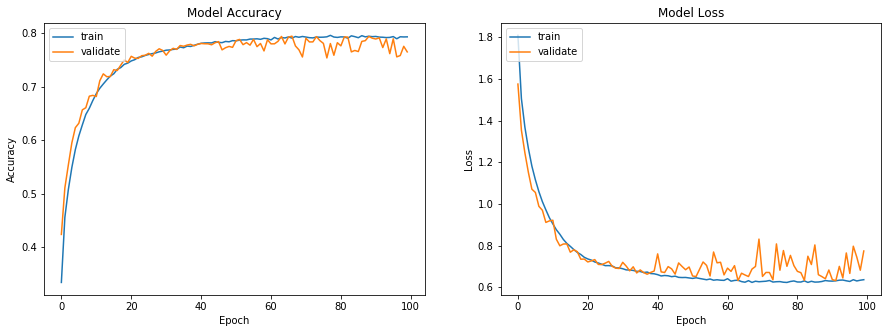

In [9]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)


In [10]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

10000/10000 [==============================] - 1s 88us/step
Test loss: 0.7736648731231689
Test accuracy: 0.7649000287055969


Now Let's investigate for errors.
### 5.3 Confusion matrix.
Confusion matrix can be very helpfull to see your model drawbacks.
We plot the confusion matrix of the validation results.
For good vizualization of our confusion matrix, we have to define to fonction.

In [11]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 

In [16]:
y_true=np.argmax(y_test,axis=1)

### 5.4 Classification report

This will allow us to evaluate the model with other metrics **(Precision, Recall, F1 score, etc...)**

In [19]:
print(classification_report(y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1000
           1       0.93      0.77      0.84      1000
           2       0.72      0.65      0.68      1000
           3       0.77      0.47      0.59      1000
           4       0.77      0.73      0.75      1000
           5       0.69      0.74      0.72      1000
           6       0.71      0.91      0.80      1000
           7       0.84      0.81      0.83      1000
           8       0.90      0.84      0.87      1000
           9       0.64      0.96      0.77      1000

    accuracy                           0.76     10000
   macro avg       0.78      0.76      0.76     10000
weighted avg       0.78      0.76      0.76     10000



## 6. Save model and weights

Note that we need to firstly indicate the directory to save the model and the name of our model. 

In [ ]:
save_dir = os.path.join(os.getcwd(), 'models')
model_name = 'keras_cifar10_trained_model.h5'

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
